# 4.1 Determinant and Trace

In [42]:
import numpy as np
from sympy import *
from sympy.abc import x, y
import matplotlib.pyplot as plt
import scipy

def get_m0(n: int):
    """
    get a fundamental matrix in statistics, "centering matrix" that is used to transform data to
    deviations from their mean
    :param n: length of data
    :return: $M_0$
    """
    return (-1 / n) * np.ones((n, n)) + np.eye(n)


def sum(array):
    n = array.shape[0]
    i = np.ones(n)

    return np.dot(i, array)

def mean(array):
    import numpy as np
    n = array.shape[0]
    i = np.ones(n)
    return (1 / n) * np.dot(i, array)


def mean_deviation(array):
    n = array.shape[0]
    m0 = get_m0(n)
    return np.matmul(m0, array)


def sum_of_squares(array):
    return np.sum(array ** 2)


def sum_of_squared_deviation(array):
    return sum_of_squares(mean_deviation(array))


def sum_of_squres_matrix(a, b):
    z = np.c_[a, b]
    return z.T.matmul(get_m0(z.shape[0])).matmul(z)


def rref(matrix):
    m = Matrix(matrix)
    return np.array(m.rref()[0].tolist()).astype(np.float64)

def rank(matrix):
    return np.linalg.matrix_ranK(matrix)

def det(matrix):
    return np.linalg.det(matrix)

def inv(matrix):
    return np.linalg.inv(matrix)

def l1_norm(matrix):
    return np.abs(np.array(matrix)).sum()

def l2_norm(matrix):
    return np.sqrt((np.array(matrix) ** 2).sum())

def dot(arr1, arr2):
    return np.dot(np.array(arr1), np.array(arr2))

def arccos(angle):
    return np.arccos(angle)

def arccos_deg(angle):
    return arccos(angle) * 180 / np.pi

def orthogonal(arr1, arr2):
    return dot(arr1, arr2) == 0

def normalize(v):
    return v/l2_norm(v)

def inner_product(x, y, A):
    x_arr = np.array(x)
    y_arr = np.array(y)
    A_arr = np.array(A)
    return np.matmul(np.matmul(x_arr, A_arr), y_arr.T)
def proj_matrix(U):
    U_arr = np.array(U)

    return U_arr.dot(inv(U_arr.T.dot(U_arr))).dot(U_arr.T)

def proj(v, U):
    v_arr = np.array(v)

    return proj_matrix(U).dot(v_arr)

def gram_schmidt(B):
    B_arr = np.array(B)
    for i in range(B_arr.shape[1]):
        if i == 0:
            U = normalize(B_arr[:, i])
            U = U.reshape(U.shape[0], -1)
        else:
            U_j = normalize(B_arr[:, i] - proj(B_arr[:, i], U))
            U = np.c_[U, U_j]
    return U

def rotate(x, deg):
    x_arr = np.array(x)
    rad = deg*np.pi/180
    return np.matmul(np.array([[np.cos(rad), -np.sin(rad)], [np.sin(rad), np.cos(rad)]]), x_arr)

def det_laplace_expansion(A, checked=False):
    arr = np.array(A)
    if not checked:
        if len(arr.shape) == 1:
            assert arr.shape[0] == 1, "Input matrix is not square."
        else:
            assert arr.shape[0] == arr.shape[1], "Input matrix is not square."
    check = True
    if (arr.shape[0] == 1):
        return arr
    else:
        det = 0
        for i in range(arr.shape[0]):
            row_index = np.array([x for x in range(arr.shape[0]) if x != i])[:,np.newaxis]
            print(arr.shape[0])
            print(row_index)
            column_index = np.array([x for x in range(arr.shape[1]) if x != 0])
            print(column_index)
            print(arr[row_index, column_index])
            det += ((-1)**i) * det_laplace_expansion(arr[row_index, column_index], checked)
        return det

def trace(A):
    arr = np.array(A)
    return np.trace(A)

def charpoly(A):
    M = Matrix(A)
    return M.charpoly(x).as_expr()

def eig(A):
    M = np.array(A)
    return np.linalg.eig(M)

def cholesky(lA):
    arrA = np.array(lA)
    return np.linalg.cholesky(arrA)    


def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

def eigen_decomposition(lA):
    arrA = np.array(lA)
    results = eig(arrA)
    assert det(results[1]) != 0, "Defective matrix cannot be diagonalized."
    return (results[1], np.diag(results[0]), inv(results[1]))

def svd(lA):
    arrA = np.array(lA)
    U, S, VT = scipy.linalg.svd(arrA)
    Sigma = np.zeros(arrA.shape)
    k = min(arrA.shape)
    Sigma[:k, :k] = np.diag(S)
    return U, Sigma, VT

def pinv(lA):
    arrA = np.array(A)
    U, s, VT = np.linalg.svd(A)
    d = 1.0/s
    D = np.zeros(A.shape)
    k = min(A.shape)
    D[:k, :k] = np.diag(d)
    return (VT.T).dot((D.T).dot(U.T))

def approximate(lA, n_components):
    arrA = np.array(lA)
    U, Sigma, VT = svd(arrA)
    Sigmak = Sigma[:, :n_components]
    VTk = VT[:n_components, :]
    print(U.shape, Sigmak.shape, VTk.shape)
    return U.dot(Sigmak.dot(VTk))

class LinearRegression:

    def __init__(self):
        self._params_ = None
        self._intercept_ = None
        self._coef_ = None

    @property
    def params_(self):
        return self._params_

    @params_.setter
    def params_(self, params):
        import numpy as np
        self._params_ = np.array(params)

    @property
    def intercept_(self):
        return self._intercept_

    @intercept_.setter
    def intercept_(self, intercept):
        import numpy as np
        self._intercept_ = np.array(intercept)

    @property
    def coef_(self):
        return self._coef_

    @coef_.setter
    def coef_(self, coef):
        import numpy as np
        self._coef_ = np.array(coef)

    def fit(self, X, y):
        n = X.shape[0]
        ones = np.ones(n)
        feat = np.c_[X, ones]
        inv = np.linalg.inv(np.matmul(feat.T, feat))
        self.params_ = np.matmul(np.matmul(inv, feat.T), y)
        self.coef_ = self.params_[0]
        self.intercept_ = self.params_[1]
        print(self.params_)

    def predict(self, x):
        n = x.shape[0]
        feat = np.c_[x, np.ones(n)]
        return np.matmul(feat, self.params_)

In [ ]:
def det_laplace_expansion(A, checked=False):
    arr = np.array(A)
    if not checked:
        if len(arr.shape) == 1:
            assert arr.shape[0] == 1, "Input matrix is not square."
        else:
            assert arr.shape[0] == arr.shape[1], "Input matrix is not square."
    check = True
    if (arr.shape[0] == 1):
        return arr
    else:
        det = 0
        for i in range(arr.shape[0]):
            row_index = np.array([x for x in range(arr.shape[0]) if x != i])[:,np.newaxis]
            print(arr.shape[0])
            print(row_index)
            column_index = np.array([x for x in range(arr.shape[1]) if x != 0])
            print(column_index)
            print(arr[row_index, column_index])
            det += ((-1)**i) * det_laplace_expansion(arr[row_index, column_index], checked)
        return det


In [ ]:
charpoly([[1, 3], [2, 0]])

x**2 - x - 6

# 4.2 Eigenvalues and Eigenvectors

In [ ]:
results = eig([[4, 2],
               [1, 3]])

In [ ]:
results[0]

array([5., 2.])

In [ ]:
results[1]

array([[ 0.89442719, -0.70710678],
       [ 0.4472136 ,  0.70710678]])

In [ ]:
results = eig([[1, 1/2],
               [0, 1]])

In [ ]:
results[1]

array([[ 1.0000000e+00, -1.0000000e+00],
       [ 0.0000000e+00,  4.4408921e-16]])

In [ ]:
results = eig([[1, -1],
               [-1, 1]])
results

(array([2., 0.]), array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [ ]:
eig([[1, 1/2],
     [1/2, 1]])

(array([1.5, 0.5]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## Theorem 4.14

Given a matrix $A \in \mathbb{R}^{m\times n}$, we can always obtain a symmetric, positive semidefinite matrix $S\in \mathbb{R}^{n\times n}$ by defining

$$S:=A^TA$$.

_Remark_. If $\mbox{rk}(A) =n $, then $S:=A^TA$ is symmetric and positive definite.

If $\mbox{rk}(A)=n$, $Ax=\textbf{0}$ implies $x=\textbf{0}$. Thus $x^TA^TAx=(Ax)^TAx=0$ is satisfied only by $x=\textbf{0}$.

## Theorem 4.15 (Spectral Theorem)

If $A\in\mathbb{R}^{n\times n}$ is symmetric, there exists an orthonormal basis of the corresponding vector space $V$ consisting of eigenvectors of $A$, and each eigenvalue is real

In [ ]:
results = eig([[3, 2, 2],
               [2, 3, 2],
               [2, 2, 3]])

In [ ]:
results[0]

array([1., 7., 1.])

In [ ]:
results[1]

array([[-0.81649658,  0.57735027, -0.27546855],
       [ 0.40824829,  0.57735027, -0.52791413],
       [ 0.40824829,  0.57735027,  0.80338269]])

In [ ]:
results[1][:, 0].dot(results[1][:, 2])

0.33737869762173567

In [ ]:
U = np.c_[results[1][:, 0], results[1][:, 2]]

In [ ]:
L = gram_schmidt(U)

In [ ]:
L[:, 0].dot(L[:, 1])

1.4738043614404746e-17

In [ ]:
L[:, 0].dot(results[1][:, 1])

-8.544485034207768e-17

In [ ]:
L[:, 1].dot(results[1][:, 1])

1.0582502360276315e-16

In [ ]:
B = np.c_[L, results[1][:, 1]]

In [ ]:
det(B)

0.9999999999999998

# 4.3 Cholesky Decomposition


# 4.4 Eigendecomposition and Diagonalization

In [47]:
eigen_decomposition([[5/2, -1], [-1, 5/2]])

(array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]), array([[3.5, 0. ],
        [0. , 1.5]]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

(-1.0, 1.0)

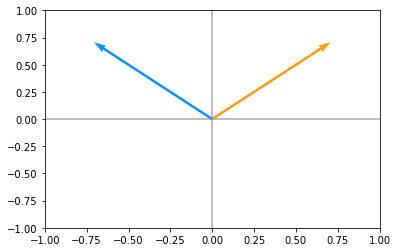

In [56]:
%matplotlib inline
results = eig([[5/2, -1], [-1, 5/2]])
orange = '#FF9A13'
blue = '#1190FF'

plotVectors(results[1], cols=[orange, blue])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# 4.5 Singular Value Decomposition

## 4.5.1 Geometric Intuition for the SVD

In [24]:
import scipy
import numpy as np
def svd(lA):
    arrA = np.array(A)
    U, S, VT = np.linalg.svd(arrA)
    Sigma = np.zeros(arrA.shape)
    k = min(arrA.shape)
    Sigma[:k, :k] = np.diag(S)
    return U, Sigma, VT

In [26]:
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
U, Sigma, V = svd(A)
U.dot(Sigma.dot(VT))

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [27]:
P, L, Pinv = eigen_decomposition(A)
P.dot(L.dot(Pinv))

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [15]:
scipy.linalg.eig(A)

(array([ 1.61168440e+01+0.j, -1.11684397e+00+0.j, -1.30367773e-15+0.j]),
 array([[-0.23197069, -0.78583024,  0.40824829],
        [-0.52532209, -0.08675134, -0.81649658],
        [-0.8186735 ,  0.61232756,  0.40824829]]))

In [16]:
scipy.linalg.svd(A)

(array([[-0.21483724,  0.88723069,  0.40824829],
        [-0.52058739,  0.24964395, -0.81649658],
        [-0.82633754, -0.38794278,  0.40824829]]),
 array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]),
 array([[-0.47967118, -0.57236779, -0.66506441],
        [-0.77669099, -0.07568647,  0.62531805],
        [-0.40824829,  0.81649658, -0.40824829]]))

# SVD for Pseudoinverse


The pseudoinverse is denoted as $A^+$, where $A$ is the matrix that is being inverted and + is a superscript.

$A^+ = VD^+U^T$

The $D^+$ can be calculated by creating a diagonal matrix from Sigma, calculating the reciprocal of each non-zero element in Sigma, and taking the transpose if the original matrix was rectangular.



In [17]:
# Pseudoinverse
# define matrix
A = np.array([[0.1, 0.2],
              [0.3, 0.4],
              [0.5, 0.6],
              [0.7,
               0.8]])
print(A)
# calculate pseudoinverse
B = np.linalg.pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.0000000e+01 -5.0000000e+00  8.4040814e-15  5.0000000e+00]
 [ 8.5000000e+00  4.5000000e+00  5.0000000e-01 -3.5000000e+00]]


In [22]:
def pinv(lA):
    arrA = np.array(A)
    U, s, VT = np.linalg.svd(A)
    d = 1.0/s
    D = np.zeros(A.shape)
    k = min(A.shape)
    D[:k, :k] = np.diag(d)
    return (VT.T).dot((D.T).dot(U.T))

In [23]:
pinv(A)

array([[-1.0000000e+01, -5.0000000e+00,  8.4040814e-15,  5.0000000e+00],
       [ 8.5000000e+00,  4.5000000e+00,  5.0000000e-01, -3.5000000e+00]])

In [21]:
np.linalg.pinv(A)

array([[-1.0000000e+01, -5.0000000e+00,  8.4040814e-15,  5.0000000e+00],
       [ 8.5000000e+00,  4.5000000e+00,  5.0000000e-01, -3.5000000e+00]])

# SVD for Dimensionality Reduction

In [63]:
def matrix_approximate(lA, n_components):
    arrA = np.array(lA)
    U, Sigma, VT = svd(arrA)
    Sigmak = Sigma[:, :n_components]
    VTk = VT[:n_components, :]
    print(U.shape, Sigmak.shape, VTk.shape)
    return U.dot(Sigmak.dot(VTk))

In [44]:
lA = np.array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])

In [64]:
matrix_approximate(lA, 1)

(3, 3) (3, 1) (1, 10)


array([[ 4.47097996,  4.76535855,  5.05973714,  5.35411573,  5.64849431,
         5.9428729 ,  6.23725149,  6.53163008,  6.82600867,  7.12038725],
       [12.02453586, 12.81625622, 13.60797659, 14.39969695, 15.19141732,
        15.98313768, 16.77485805, 17.56657841, 18.35829878, 19.15001914],
       [19.57809176, 20.8671539 , 22.15621604, 23.44527818, 24.73434032,
        26.02340247, 27.31246461, 28.60152675, 29.89058889, 31.17965103]])

In [62]:
approximate(lA, 2)

(3, 3) (3, 2) (2, 10)


array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]])

In [60]:
approximate(lA, 3)

(3, 3) (3, 3) (3, 10)


array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]])